# Introduction to regular expressions

## Dependances

In [233]:
import re
import os 
import sys
from urllib.request import urlopen


In [234]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from bs4 import BeautifulSoup


In [235]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [236]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [237]:
# with open("../data/t1.txt") as f:   
#     text = f.read()
# text

### from url

In [238]:
url = "http://astronautix.com/v/v-2.html"
html = urlopen(url).read()


text = BeautifulSoup(html, 'html.parser').get_text()
text[:200]

'\n\n\n\n\n\n\n\nV-2\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome - Search - Browse - Alphabetic Index: 0- 1- 2- 3- 4- 5- 6- 7- 8- 9A- B- C- D- E- F- G- H- I- J- K- L- M- N- O- P- Q- R- S- T- U- V- W- X- Y- Z\n\n\n\n\nV-2\nV-2Credit'

## Sentence tokenizing:

In [239]:
sentences=sent_tokenize(text)

print(len(sentences))

sentences

20396


["\n\n\n\n\n\n\n\nV-2\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome - Search - Browse - Alphabetic Index: 0- 1- 2- 3- 4- 5- 6- 7- 8- 9A- B- C- D- E- F- G- H- I- J- K- L- M- N- O- P- Q- R- S- T- U- V- W- X- Y- Z\n\n\n\n\nV-2\nV-2Credit: © Mark Wade\r\nThe V-2 ballistic missile (known to its designers as the A4) was the world's first operational liquid fuel rocket.",
 'It represented an enormous quantum leap in technology, financed by Nazi Germany in a huge development program that cost at least $ 2 billion in 1944 dollars.',
 '6,084 V-2 missiles were built, 95% of them by 20,000 slave laborers in the last seven months of World War II at a unit price of $ 17,877.',
 'As many as 3,225 were launched in combat, primarily against Antwerp and London, and a further 1,000 to 1,750 were fired in tests and training.',
 'Despite the scale of this effort, the inaccurate missile did not change the course of the war and proved to be an enormous waste of resources.',
 "The British, Americans, an

## Word tokenizing

In [240]:
words=word_tokenize(text)
print(len(words))

print(words)

153031
['V-2', 'Home', '-', 'Search', '-', 'Browse', '-', 'Alphabetic', 'Index', ':', '0-', '1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-', '9A-', 'B-', 'C-', 'D-', 'E-', 'F-', 'G-', 'H-', 'I-', 'J-', 'K-', 'L-', 'M-', 'N-', 'O-', 'P-', 'Q-', 'R-', 'S-', 'T-', 'U-', 'V-', 'W-', 'X-', 'Y-', 'Z', 'V-2', 'V-2Credit', ':', '©', 'Mark', 'Wade', 'The', 'V-2', 'ballistic', 'missile', '(', 'known', 'to', 'its', 'designers', 'as', 'the', 'A4', ')', 'was', 'the', 'world', "'s", 'first', 'operational', 'liquid', 'fuel', 'rocket', '.', 'It', 'represented', 'an', 'enormous', 'quantum', 'leap', 'in', 'technology', ',', 'financed', 'by', 'Nazi', 'Germany', 'in', 'a', 'huge', 'development', 'program', 'that', 'cost', 'at', 'least', '$', '2', 'billion', 'in', '1944', 'dollars', '.', '6,084', 'V-2', 'missiles', 'were', 'built', ',', '95', '%', 'of', 'them', 'by', '20,000', 'slave', 'laborers', 'in', 'the', 'last', 'seven', 'months', 'of', 'World', 'War', 'II', 'at', 'a', 'unit', 'price', 'of', '$', '17,

## Find the frequency distribution

In [241]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('.', 20387),
 (':', 11753),
 ('Launch', 6398),
 ('-', 6308),
 ('V-2', 6212),
 (',', 4761),
 ('Nation', 2854),
 ('Vehicle', 2501),
 ('Site', 2459),
 ('the', 2386)]

## Plot the frequency graph

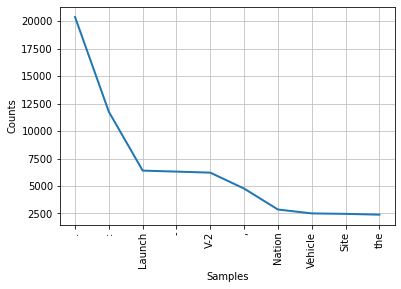

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [242]:
import matplotlib.pyplot as plt

fdist.plot(10)

## Remove punctuation marks

In [243]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['Home', 'Search', 'Browse', 'Alphabetic', 'Index', 'Z', 'Mark', 'Wade', 'The', 'ballistic', 'missile', 'known', 'to', 'its', 'designers', 'as', 'the', 'was', 'the', 'world', 'first', 'operational', 'liquid', 'fuel', 'rocket', 'It', 'represented', 'an', 'enormous', 'quantum', 'leap', 'in', 'technology', 'financed', 'by', 'Nazi', 'Germany', 'in', 'a', 'huge', 'development', 'program', 'that', 'cost', 'at', 'least', 'billion', 'in', 'dollars', 'missiles']
82927


## Plotting graph without punctuation marks

In [244]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('Launch', 6398),
 ('Nation', 2854),
 ('Vehicle', 2501),
 ('Site', 2459),
 ('the', 2386),
 ('Germany', 2257),
 ('to', 2101),
 ('km', 1648),
 ('from', 1634),
 ('of', 1622)]

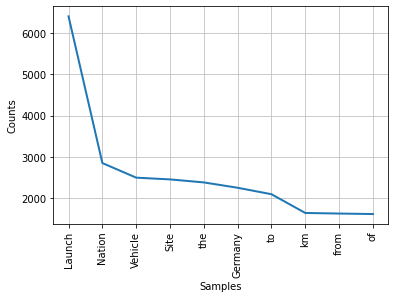

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [245]:
fdist.plot(10)

## List of stopwords

In [246]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Removing stopwords

In [247]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['Home', 'Search', 'Browse', 'Alphabetic', 'Index', 'Z', 'Mark', 'Wade', 'The', 'ballistic', 'missile', 'known', 'designers', 'world', 'first', 'operational', 'liquid', 'fuel', 'rocket', 'It', 'represented', 'enormous', 'quantum', 'leap', 'technology', 'financed', 'Nazi', 'Germany', 'huge', 'development', 'program', 'cost', 'least', 'billion', 'dollars', 'missiles', 'built', 'slave', 'laborers', 'last', 'seven', 'months', 'World', 'War', 'II', 'unit', 'price', 'As', 'many', 'launched', 'combat', 'primarily', 'Antwerp', 'London', 'fired', 'tests', 'training', 'Despite', 'scale', 'effort', 'inaccurate', 'missile', 'change', 'course', 'war', 'proved', 'enormous', 'waste', 'resources', 'The', 'British', 'Americans', 'Russians', 'launched', 'captured', 'German', 'Personnel', 'technology', 'program', 'formed', 'starting', 'point', 'rocketry', 'development', 'America', 'Russia', 'France', 'The', 'steps', 'development', 'missile', 'Later', 'versions', 'planned', 'take', 'Third', 'Reich', 'plan

## Final frequency distribution

In [248]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('Launch', 6398),
 ('Nation', 2854),
 ('Vehicle', 2501),
 ('Site', 2459),
 ('Germany', 2257),
 ('km', 1648),
 ('launch', 1516),
 ('rocket', 1458),
 ('Battery', 1319),
 ('The', 1269)]

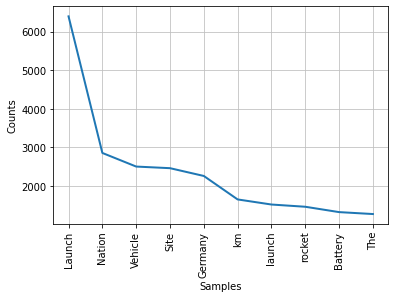

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [249]:
fdist.plot(10)

## Word Cloud

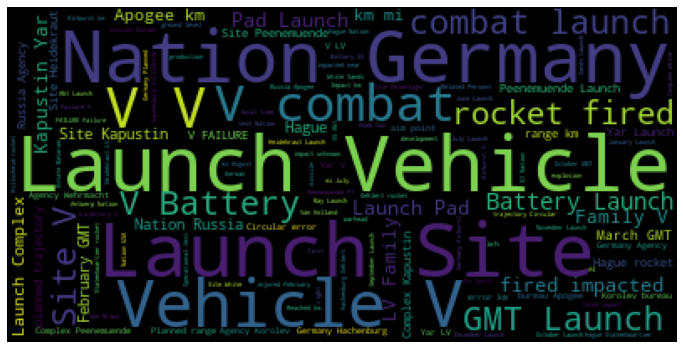

In [250]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [251]:
clean_words_joined=' '.join(clean_words)

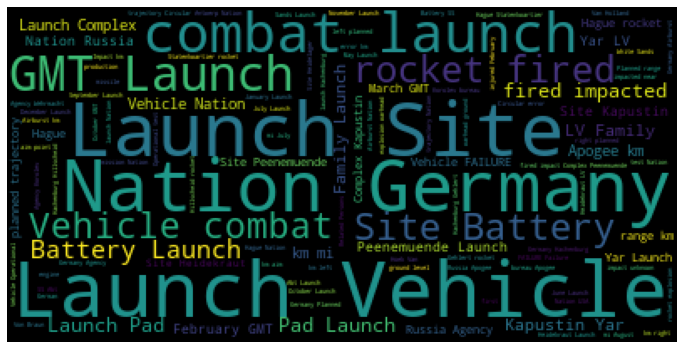

In [252]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

# Bag-of-Words

In [253]:
from nltk.tokenize import word_tokenize
from collections import Counter

text=text.lower()
Counter(word_tokenize(text))


Counter({'v-2': 6212,
         'home': 2,
         '-': 6308,
         'search': 2,
         'browse': 2,
         'alphabetic': 2,
         'index': 2,
         ':': 11753,
         '0-': 2,
         '1-': 2,
         '2-': 2,
         '3-': 2,
         '4-': 2,
         '5-': 2,
         '6-': 2,
         '7-': 2,
         '8-': 2,
         '9a-': 2,
         'b-': 2,
         'c-': 2,
         'd-': 2,
         'e-': 2,
         'f-': 2,
         'g-': 2,
         'h-': 2,
         'i-': 2,
         'j-': 2,
         'k-': 2,
         'l-': 2,
         'm-': 2,
         'n-': 2,
         'o-': 2,
         'p-': 2,
         'q-': 2,
         'r-': 2,
         's-': 2,
         't-': 2,
         'u-': 2,
         'v-': 2,
         'w-': 2,
         'x-': 2,
         'y-': 2,
         'z': 2,
         'v-2credit': 1,
         '©': 4,
         'mark': 3,
         'wade': 3,
         'the': 3655,
         'ballistic': 31,
         'missile': 149,
         '(': 1270,
         'known': 16,

In [254]:
Counter(text).most_common(2)

[(' ', 118602), ('e', 55129)]

In [255]:
Counter(word_tokenize(text)).most_common(2)

[('.', 19128), (':', 11753)]